In [19]:
import pandas as pd

# Load the CSV file
pathname = '/Users/jcoleman/Documents/--LARGE DATA--/#Pizzi/TBI-sham leak analysis/scripts/matlab-copy/August 2024/'
filename = 'analysisData_101024.csv'
df = pd.read_csv(pathname+filename)

print(df['filename'])
print(df['group'])

0     ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA
1     ZT10_16X6x_gg_800nm_m6_roi1_00001_ROIs_classA
2     ZT10_16X6x_gg_800nm_m7_roi1_00001_ROIs_classA
3     ZT10_16X6x_gg_800nm_m9_roi1_00002_ROIs_classA
4    ZT10_16X6x_gg_800nm_m10_roi1_00001_ROIs_classA
5    ZT10_16X6x_gg_800nm_m11_roi1_00001_ROIs_classA
6    ZT10_16X6x_gg_800nm_m12_roi1_00001_ROIs_classA
7    ZT10_16X6x_gg_800nm_m13_roi1_00002_ROIs_classA
8    ZT10_16X6x_gg_800nm_m15_roi1_00001_ROIs_classA
9    ZT10_16X6x_gg_800nm_m16_roi1_00001_ROIs_classA
Name: filename, dtype: object
0    A
1    A
2    B
3    A
4    A
5    A
6    A
7    B
8    B
9    B
Name: group, dtype: object


In [20]:
# dfTable = pd.read_table(pathname+filename)

# print(dfTable.head())

In [21]:
# Transfrom CSV from allData (MATLAB output)
# import pandas as pd
import numpy as np

"""
Convention and column order: It's generally better to keep the 'rowID' as the first column across all output files for consistency.
This makes it easier to identify and work with the data, especially when doing analyses or merging datasets later.
Data format: The format we've created is indeed considered "long" or "tidy" format.

In tidy data:
Each variable forms a column
Each observation forms a row
Each type of observational unit forms a table

This format is preferred for many types of analyses and is especially useful for tools like ggplot in R
or seaborn in Python.
"""

# Assuming maximum 40 measurements per row per metric/set of values
# NOTE: Set the max number of 'rois' (ie data values per metric per observation-subject in the dataset)
max_roi_num = 40

# headers_to_extract = ['meanFWHM', 'stdevFWHM', 'minFWHM', 'maxFWHM', 'meanFeFv', 'stdevFeFv', 'minFeFv', 'maxFeFv']
# headers_to_extract = ['meanFWHM', 'stdevFWHM', 'minFWHM', 'maxFWHM', 'meanPvLeak', 'stdevPvLeak', 'minPvLeak', 'maxPvLeak']
headers_to_extract = ['meanFWHM', 'stdevFWHM', 'minFWHM', 'maxFWHM', 'meanPvLeak', 'stdevPvLeak', 'minPvLeak', 'maxPvLeak', 'X', 'Y', 'Z']

# TESTheaders_to_extract = ['meanFWHM', 'stdevFWHM', 'minFWHM', 'maxFWHM']
logicals_to_extract = [
    'capLogical',
    'venLogical',
    'artLogical',
    'midLogical',
    'preLogical',
    'pstLogical',
    'midCapLogical',
    'preCapLogical',
    'pstCapLogical',
    'midVenLogical',
    'preVenLogical',
    'pstVenLogical',
    'midArtLogical',
    'preArtLogical',
    'pstArtLogical',
]
# logicals_to_extract = ['capLogical', 'venLogical', 'artLogical']
# logicals_to_extract = ['capLogical', 'venLogical']

# Function to create the rowID
def create_row_id(row, index):
    return f"{row['filename']}_{index:02d}"

# Function to extract columns and create new rows
def extract_columns(row):
    new_rows = []
    for i in range(1, max_roi_num): # Set maximum measurements per row per metric per set of values (ie rois analyzed per subject)
        new_row = {'rowID': create_row_id(row, i)}
        for header in headers_to_extract:
            new_row[header] = row.get(f"{header}_{i}", np.nan)
        for logical in logicals_to_extract:
            new_row[logical] = row.get(f"{logical}_{i}", np.nan)
        new_row['group'] = row['group']
        new_rows.append(new_row)
    return new_rows

# Create the new dataframe
new_rows = [row for rows in df.apply(extract_columns, axis=1) for row in rows]
df_output = pd.DataFrame(new_rows)

# Ensure 'rowID' is the first column
column_order = ['rowID'] + [col for col in df_output.columns if col != 'rowID']
df_output = df_output[column_order]

# Create output1a (with all rows, including those with NaN values)
df_output1a = df_output.copy()
df_output1a.to_csv('Data2_output1a_transii.csv', index=False)

# Create output1b (without rows that have all NaN values in headers_to_extract)
df_output1b = df_output[df_output[headers_to_extract].notna().any(axis=1)]
df_output1b.to_csv('Data2_output1b_transii.csv', index=False)

# Create output1c (without logicals and group, and without rows that have all NaN values in headers_to_extract)
df_output1c = df_output[['rowID'] + headers_to_extract]
df_output1c = df_output1c[df_output1c[headers_to_extract].notna().any(axis=1)]
df_output1c.to_csv('Data2_output1c_transii.csv', index=False)

print("Transformation complete. Output files have been generated.")
print("Be sure to delete all rows with empty cells/nans before PCA.")

Transformation complete. Output files have been generated.
Be sure to delete all rows with empty cells/nans before PCA.


In [22]:
print(df_output1c.head())

print(df_output1a.shape)
print(df_output1b.shape)
print(df_output1c.shape)

                                              rowID  meanFWHM  stdevFWHM  \
0  ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_01  3.740378   0.120027   
1  ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_02  4.100067   0.120158   
2  ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_03  6.326261   0.091814   
3  ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_04  6.066305   0.070735   
4  ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_05       NaN        NaN   

    minFWHM   maxFWHM  meanPvLeak  stdevPvLeak  minPvLeak  maxPvLeak      X  \
0  3.542297  3.907355    0.724227     0.008986   0.706560   0.734500   30.0   
1  3.922870  4.245508    0.739692     0.001860   0.735732   0.741959  213.0   
2  6.202881  6.441604    0.678211     0.020652   0.639518   0.710663  436.0   
3  5.974274  6.145408    0.742717     0.001182   0.740697   0.744538  278.0   
4       NaN       NaN         NaN          NaN        NaN        NaN  326.0   

       Y     Z  
0  366.5  10.0  
1  242.0  20.0  
2  193.5  25.0  


In [23]:
df_pca_withIDs = df_output1b.dropna(how='any')
df_pca_withIDs.to_csv('df_forPCA_withIDs_101124.csv', index=False)
print(df_pca_withIDs.head())
print(df_pca_withIDs.shape)

                                               rowID  meanFWHM  stdevFWHM  \
0   ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_01  3.740378   0.120027   
1   ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_02  4.100067   0.120158   
2   ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_03  6.326261   0.091814   
3   ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_04  6.066305   0.070735   
39  ZT10_16X6x_gg_800nm_m6_roi1_00001_ROIs_classA_01  5.886713   0.134211   

     minFWHM   maxFWHM  meanPvLeak  stdevPvLeak  minPvLeak  maxPvLeak      X  \
0   3.542297  3.907355    0.724227     0.008986   0.706560   0.734500   30.0   
1   3.922870  4.245508    0.739692     0.001860   0.735732   0.741959  213.0   
2   6.202881  6.441604    0.678211     0.020652   0.639518   0.710663  436.0   
3   5.974274  6.145408    0.742717     0.001182   0.740697   0.744538  278.0   
39  5.693535  6.101866    0.710036     0.008617   0.697944   0.727322  404.0   

    ...  midCapLogical  preCapLogical  pstCapLogical  mi

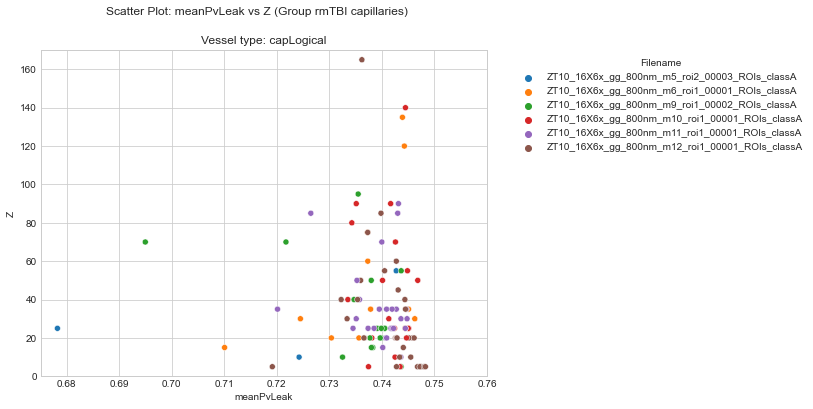

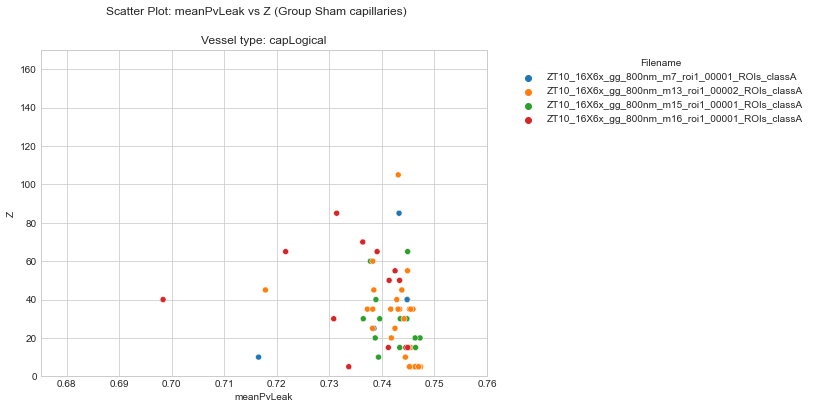

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

def filter_dataframe(df, metric_prefix, second_metric_prefix, logical_prefix, group):
    """
    Filters the DataFrame to return rows for a specific group and metric columns 
    based on corresponding logical columns being 1.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    metric_prefix (str): The prefix for the first metric column (e.g., 'meanFWHM').
    second_metric_prefix (str): The prefix for the second metric column to plot against.
    logical_prefix (str): The prefix for columns representing logicals (e.g., 'capLogical').
    group (str): The group ID (e.g., 'A', 'B') for row filtering.

    Returns:
    pd.DataFrame: A filtered DataFrame with the two metrics and group columns.
    """
    # Filter rows based on the group
    filtered_df = df[df['group'] == group]

    # Get metric and logical columns
    metric_columns = [col for col in df.columns if col.startswith(metric_prefix)]
    second_metric_columns = [col for col in df.columns if col.startswith(second_metric_prefix)]
    logical_columns = [col for col in df.columns if col.startswith(logical_prefix)]

    # Create a list to store valid metric columns based on logical conditions
    valid_metric_columns = []
    valid_second_metric_columns = []

    # For each metric/logical column pair, check if logical column is 1
    for metric_col, logical_col in zip(metric_columns, logical_columns):
        if (filtered_df[logical_col] == 1).any():
            valid_metric_columns.append(metric_col)

    # Use the same logic to keep second metric columns aligned
    for second_metric_col, logical_col in zip(second_metric_columns, logical_columns):
        if (filtered_df[logical_col] == 1).any():
            valid_second_metric_columns.append(second_metric_col)

    # Return the filtered DataFrame with the two valid metric columns and group
    return filtered_df[valid_metric_columns + valid_second_metric_columns + ['group', 'filename']]


def scatter_plot_with_stats(df, metric_prefix, second_metric_prefix, logical_prefix, group, xlow,xhigh,ylow,yhigh):
    """
    Plots a scatter plot of two metrics (with the same prefix) across multiple columns,
    handling NaN values, and calculates regression stats (r², p-value, Pearson correlation).
    
    Parameters:
    df (pd.DataFrame): The filtered DataFrame with multiple metric columns.
    metric_prefix (str): The first metric prefix (e.g., 'meanFWHM') for the x-axis.
    second_metric_prefix (str): The second metric prefix (e.g., 'meanFeFv') for the y-axis.
    group (str): The group ID to include in the plot (e.g., 'A' or 'B').
    """
    # Extract columns that start with the given prefixes
    metric_columns = [col for col in df.columns if col.startswith(metric_prefix)]
    second_metric_columns = [col for col in df.columns if col.startswith(second_metric_prefix)]

    # Concatenate all metric columns into single arrays for plotting
    x_vals = pd.concat([df[metric] for metric in metric_columns], axis=0)
    y_vals = pd.concat([df[second_metric] for second_metric in second_metric_columns], axis=0)
    filenames = pd.concat([df['filename']] * len(metric_columns), axis=0)

    # Remove rows where either x or y is NaN
    valid_indices = (~x_vals.isna()) & (~y_vals.isna())
    x_vals = x_vals[valid_indices]
    y_vals = y_vals[valid_indices]
    filenames = filenames[valid_indices]

    # Scatter plot
    plt.figure(figsize=(8, 6))
    #sns.scatterplot(x=x_vals, y=y_vals, hue=filenames, style=filenames, palette='tab10')
    sns.scatterplot(x=x_vals, y=y_vals, hue=filenames, marker='o', palette='tab10')

#     # Calculate statistics: Pearson correlation, p-value, and r²
#     if len(x_vals) > 1 and len(y_vals) > 1:
#         pearson_corr, p_value = pearsonr(x_vals, y_vals)
#         r_squared = pearson_corr ** 2
#         # Display stats on the plot
#         stats_text = f"Pearson's r: {pearson_corr:.2f}\n" \
#                      f"p-value: {p_value:.3e}\n" \
#                      f"r²: {r_squared:.2f}\nGroup: {group}"
#         #         plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=12,
#         #                  verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
#         #         plt.text(1.05, -0.2, stats_text, transform=plt.gca().transAxes, 
#         #          fontsize=12, verticalalignment='top', 
#         #          horizontalalignment='right', 
#         #          bbox=dict(facecolor='white', alpha=0.5))
#         plt.text(1.30, 0.25, stats_text, transform=plt.gca().transAxes, 
#          fontsize=12, verticalalignment='top', 
#          horizontalalignment='right', 
#          bbox=dict(facecolor='white', alpha=0.5))
#     else:
#         # If there are not enough valid points to calculate Pearson
#         plt.text(1.30, 0.45, f"Not enough valid data points\nGroup: {group}", transform=plt.gca().transAxes,
#                  fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    # Labels and title
    # Set x-axis limits
    if xlow is not None and xhigh is not None:
        plt.xlim(xlow, xhigh)
    if ylow is not None and yhigh is not None:
        plt.ylim(ylow, yhigh)
    
    plt.xlabel(metric_prefix)
    plt.ylabel(second_metric_prefix)
    plt.title(f'Scatter Plot: {metric_prefix} vs {second_metric_prefix} (Group {group})')
    plt.suptitle(f'Scatter Plot: {metric_prefix} vs {second_metric_prefix} (Group {group})')
    plt.title(f'Vessel type: {logical_prefix}')
    #plt.legend(title='Filename')
    plt.legend(title='Filename', bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
    #plt.tight_layout()  # Ensure proper layout
    #return plt.gcf()  # Return the figure object
    # Save the plot as a PDF file
    plt.savefig('scatter2D_'+group+'.pdf', format='pdf', dpi=300) #, bbox_inches='tight')
    plt.show()
    
# Example usage
# df = pd.read_csv('your_file.csv')
# filtered_result = filter_dataframe(df, 'meanFWHM', 'meanFeFv', 'capLogical', 'A')
# scatter_plot_with_stats(filtered_result, 'meanFWHM', 'meanFeFv', 'A')

# Boxplot code using 'df_pca_withIDs'

# get meanFeFv, Zmicrons data for 'cap'
filtered_resultA = []
filtered_resultA = filter_dataframe(df, 'meanPvLeak', 'Z', 'capLogical', 'A')
scatter_plot_with_stats(filtered_resultA, 'meanPvLeak', 'Z', 'capLogical', 'rmTBI capillaries',0.675,0.76,0,170)


filtered_resultB = []
filtered_resultB = filter_dataframe(df, 'meanPvLeak', 'Z', 'capLogical', 'B')
scatter_plot_with_stats(filtered_resultB, 'meanPvLeak', 'Z', 'capLogical', 'Sham capillaries',0.675,0.76,0,170)
# # Save the plot as a PDF file
# plt.savefig('scatter2D_Sham.pdf', format='pdf', dpi=300) #, bbox_inches='tight')

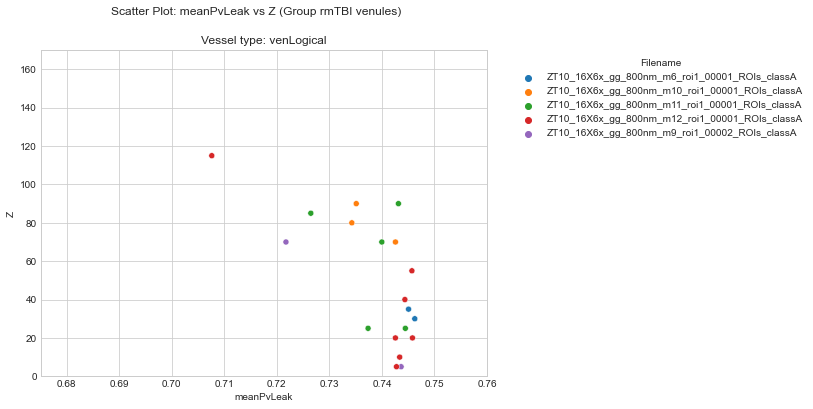

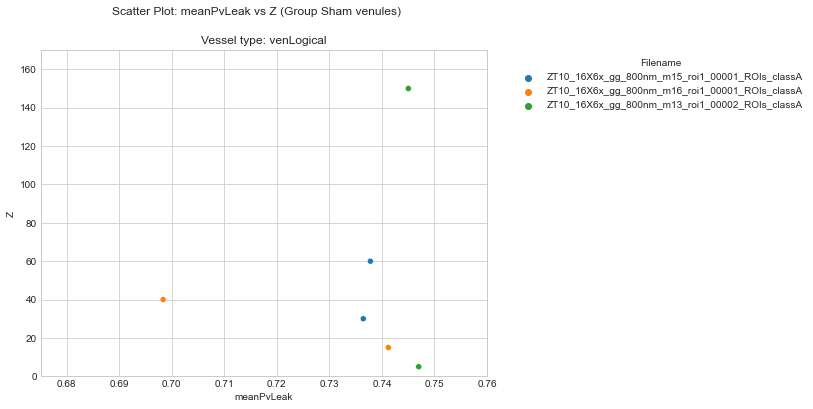

In [31]:
# get meanFeFv, Zmicrons data for 'ven'
filtered_resultA = []
filtered_resultA = filter_dataframe(df, 'meanPvLeak', 'Z', 'venLogical', 'A')
scatter_plot_with_stats(filtered_resultA, 'meanPvLeak', 'Z', 'venLogical', 'rmTBI venules',0.675,0.76,0,170)

filtered_resultB = []
filtered_resultB = filter_dataframe(df, 'meanPvLeak', 'Z', 'venLogical', 'B')
scatter_plot_with_stats(filtered_resultB, 'meanPvLeak', 'Z', 'venLogical', 'Sham venules',0.675,0.76,0,170)

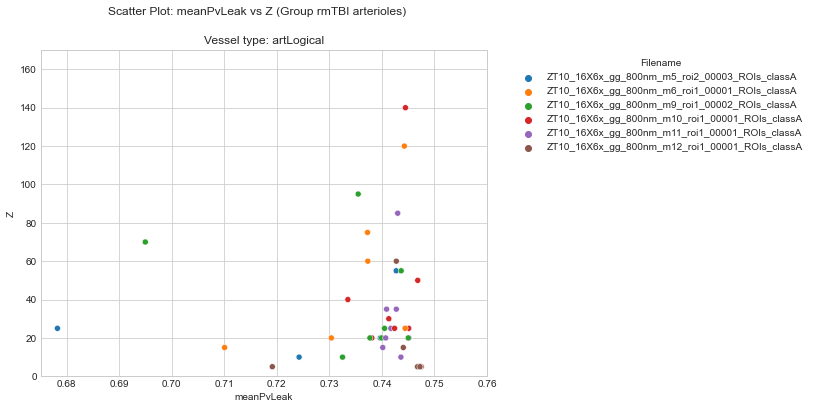

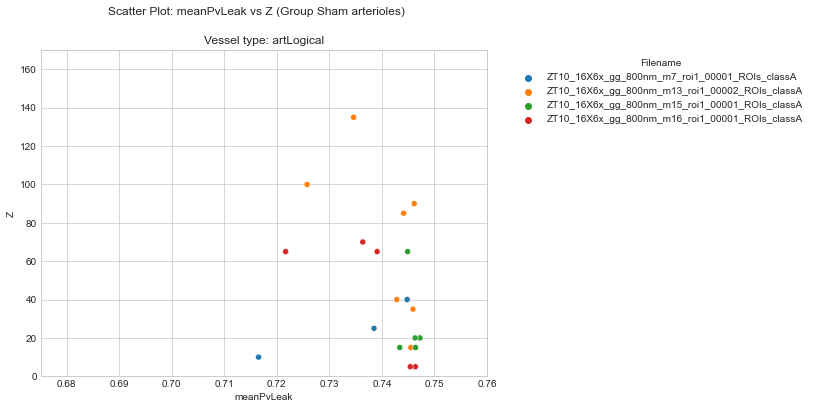

In [32]:
# get meanFeFv, Zmicrons data for 'ven'
filtered_resultA = []
filtered_resultA = filter_dataframe(df, 'meanPvLeak', 'Z', 'artLogical', 'A')
scatter_plot_with_stats(filtered_resultA, 'meanPvLeak', 'Z', 'artLogical', 'rmTBI arterioles',0.675,0.76,0,170)

filtered_resultB = []
filtered_resultB = filter_dataframe(df, 'meanPvLeak', 'Z', 'artLogical', 'B')
scatter_plot_with_stats(filtered_resultB, 'meanPvLeak', 'Z', 'artLogical', 'Sham arterioles',0.675,0.76,0,170)